For n_clusters = 2, silhouette score is 0.3842337621772661)
For n_clusters = 3, silhouette score is 0.4610481446570447)
For n_clusters = 4, silhouette score is 0.4925507715349343)
For n_clusters = 5, silhouette score is 0.5538089226688662)
For n_clusters = 6, silhouette score is 0.5386761871036926)
For n_clusters = 7, silhouette score is 0.5197949293475768)
For n_clusters = 8, silhouette score is 0.4308617778221774)
For n_clusters = 9, silhouette score is 0.43768997758154127)


Text(0, 0.5, 'Spending score (feature 2)')

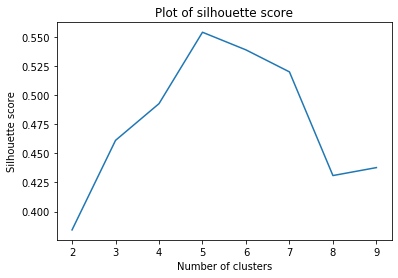

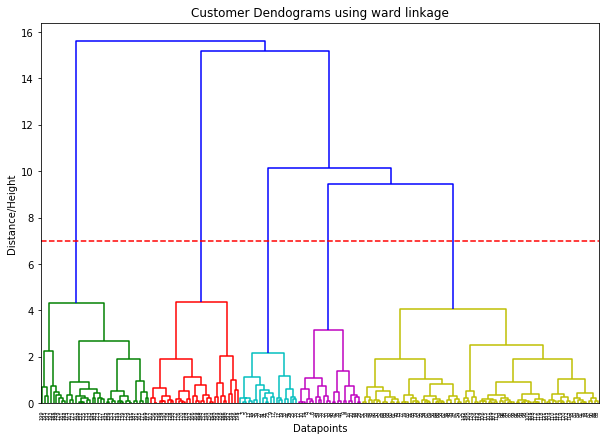

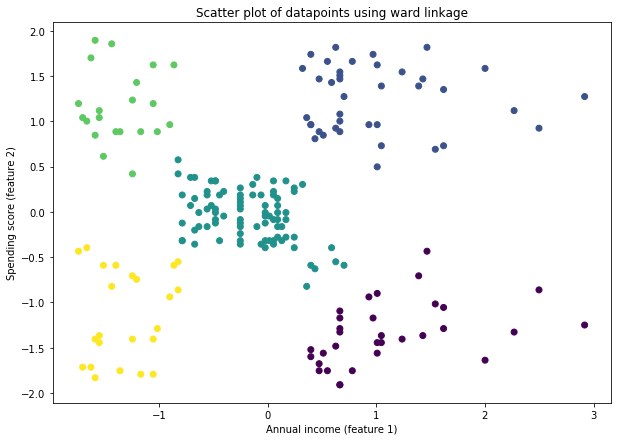

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import silhouette_score

%matplotlib inline

customer_data = pd.read_csv('shopping-data.csv')
data = customer_data.iloc[:, 3:5].values

#standardize data into the same scale
customer_data.shape
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

range_n_clusters = list (range(2,10))
scores = []
for n in range_n_clusters:
    cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    preds = cluster.fit_predict(data_scaled)

    score = silhouette_score(data_scaled, preds)
    scores.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n, score))
      
plt.plot(range_n_clusters, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Plot of silhouette score')  

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms using ward linkage")
plt.xlabel('Datapoints')
plt.ylabel('Distance/Height')
Z=shc.linkage(data_scaled, method='ward')
dend = shc.dendrogram(Z,color_threshold = 0.5*max(Z[:,2]))

#plot the threshold so it cuts the tallest vertical line
plt.axhline(y=7, color='r', linestyle='--')

#apply hierarchical clustering for 2 clusters with Agglomerative Clustering:
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

#visualize clusters
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled[:,0],data_scaled[:,1], c=cluster.labels_)
plt.title("Scatter plot of datapoints using ward linkage")
plt.xlabel('Annual income (feature 1)')
plt.ylabel('Spending score (feature 2)')


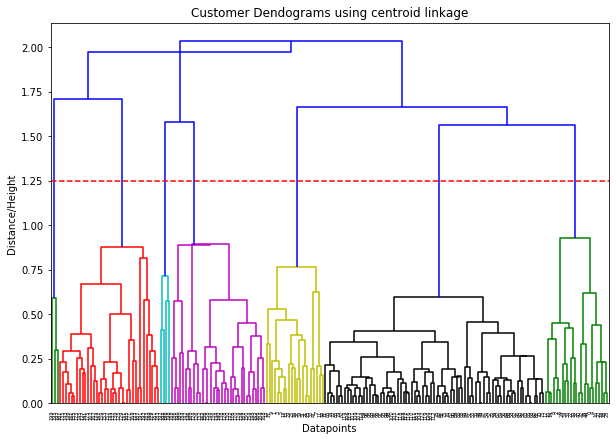

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

%matplotlib inline

customer_data = pd.read_csv('shopping-data.csv')
data = customer_data.iloc[:, 3:5].values

#standardize data into the same scale
customer_data.shape
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms using centroid linkage")
plt.xlabel('Datapoints')
plt.ylabel('Distance/Height')
dend = shc.dendrogram(shc.linkage(data_scaled, method='centroid'))

plt.axhline(y=1.25, color='r', linestyle='--')